# Creating final data for crop and fertilizer recommendation system

#### Imporing The Required Liabrary

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

#### Reading the data from Raw Datasets

In [2]:
fertilizer_data_path = '../Data-raw/FertilizerData.csv'
merge_fert = pd.read_csv(fertilizer_data_path)

#### First Five Rows In Our Datafram "merge_fert"

In [3]:
merge_fert.head()

,Unnamed: 0,label,N,P,K,pH
0,0,rice,80,40,40,5.5
1,3,maize,80,40,20,5.5
2,5,chickpea,40,60,80,5.5
3,12,kidneybeans,20,60,20,5.5
4,13,pigeonpeas,20,60,20,5.5


#### Removing The 'Unnamed:0' Column from Dataframe merge_fert

In [4]:
del merge_fert['Unnamed: 0']

In [5]:
merge_fert.describe()

,N,P,K,pH
count,22.000000,22.000000,22.000000,22.000000
mean,50.454545,45.681818,48.181818,5.409091
std,36.315715,32.634172,51.698426,0.590326
min,20.000000,10.000000,10.000000,4.000000
25%,20.000000,20.000000,20.000000,5.500000
50%,30.000000,40.000000,30.000000,5.500000
75%,80.000000,60.000000,50.000000,5.500000
max,120.000000,125.000000,200.000000,6.500000


##### In above code we are describing the datafram it gives the column wise value_count, Mean, Standard_Deviation, Minimum_Value, 25%, 50%, 75% and Maximum_Value

In [6]:
merge_fert['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

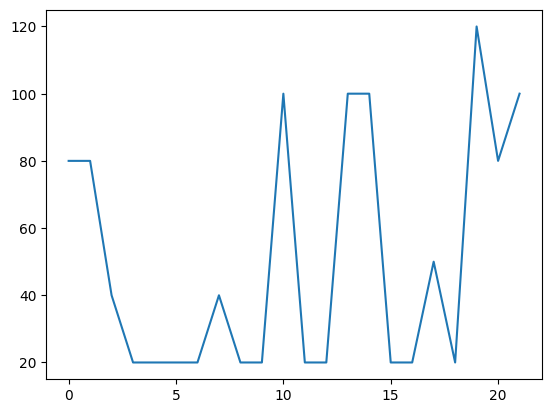

In [7]:
plt.plot(merge_fert["N"])

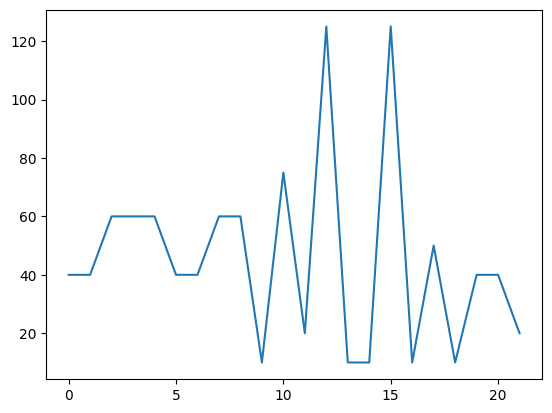

In [8]:
plt.plot(merge_fert["P"])

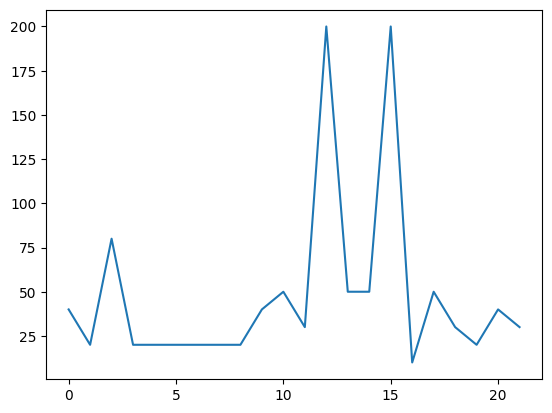

In [9]:
plt.plot(merge_fert["K"])

<Axes: >

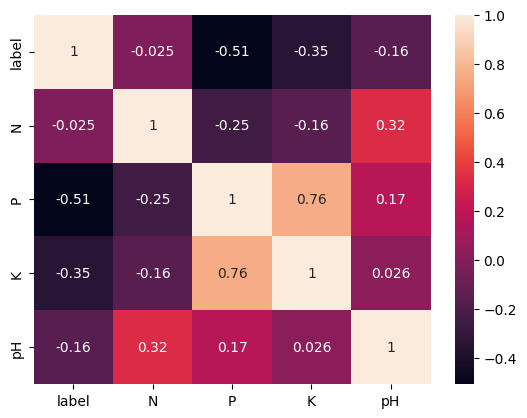

In [10]:
num_col=[]
cat_col=[]

for i in merge_fert:
    if merge_fert[i].dtypes=="object":
        cat_col.append(i)
    else:
        num_col.append(i)

le = LabelEncoder()
for col in cat_col:
    merge_fert[col] = le.fit_transform(merge_fert[col])

sns.heatmap(merge_fert.corr(),annot=True)

In [11]:
for col in cat_col:
    merge_fert[col] = le.inverse_transform(merge_fert[col])

In [12]:
merge_crop = pd.read_csv('../Data-raw/MergeFileCrop.csv')
reco_fert = merge_fert

In [13]:
#Add +/-3 for every NPK value
import random
temp = pd.DataFrame(columns = ['N','P','K'])
for i in range(0,merge_crop.shape[0]):
    crop = merge_crop.label.iloc[i]
    #print(crop)
    N = reco_fert[reco_fert['label'] == crop]['N'].iloc[0] + random.randint(-20,20)
    P = reco_fert[reco_fert['label'] == crop]['P'].iloc[0] + random.randint(-5,20)
    K = reco_fert[reco_fert['label'] == crop]['K'].iloc[0] + random.randint(-5,5)
    d = {"N":N,"P":P,"K":K}
    #print(d)
    df = pd.DataFrame(data=[d])
    temp = pd.concat([temp, df], ignore_index=True)

In [14]:
temp

,N,P,K
0,64,37,43
1,94,52,45
2,98,40,39
3,88,45,45
4,98,47,40
...,...,...,...
2195,94,37,31
2196,84,26,28
2197,89,29,28
2198,110,39,26


In [15]:
merge_crop['N'] = temp['N']
merge_crop['P'] = temp['P']
merge_crop['K'] = temp['K']

In [16]:
merge_crop

,Unnamed: 0,temperature,humidity,ph,rainfall,label,N,P,K
0,0,20.879744,82.002744,6.502985,202.935536,rice,64,37,43
1,1,21.770462,80.319644,7.038096,226.655537,rice,94,52,45
2,2,23.004459,82.320763,7.840207,263.964248,rice,98,40,39
3,3,26.491096,80.158363,6.980401,242.864034,rice,88,45,45
4,4,20.130175,81.604873,7.628473,262.717340,rice,98,47,40
...,...,...,...,...,...,...,...,...,...
2195,895,26.774637,66.413269,6.780064,177.774507,coffee,94,37,31
2196,896,27.417112,56.636362,6.086922,127.924610,coffee,84,26,28
2197,897,24.131797,67.225123,6.362608,173.322839,coffee,89,29,28
2198,898,26.272418,52.127394,6.758793,127.175293,coffee,110,39,26


In [17]:
del merge_crop['Unnamed: 0']

In [18]:
merge_crop

,temperature,humidity,ph,rainfall,label,N,P,K
0,20.879744,82.002744,6.502985,202.935536,rice,64,37,43
1,21.770462,80.319644,7.038096,226.655537,rice,94,52,45
2,23.004459,82.320763,7.840207,263.964248,rice,98,40,39
3,26.491096,80.158363,6.980401,242.864034,rice,88,45,45
4,20.130175,81.604873,7.628473,262.717340,rice,98,47,40
...,...,...,...,...,...,...,...,...
2195,26.774637,66.413269,6.780064,177.774507,coffee,94,37,31
2196,27.417112,56.636362,6.086922,127.924610,coffee,84,26,28
2197,24.131797,67.225123,6.362608,173.322839,coffee,89,29,28
2198,26.272418,52.127394,6.758793,127.175293,coffee,110,39,26


In [19]:
merge_crop = merge_crop[[ 'N', 'P', 'K','temperature', 'humidity', 'ph', 'rainfall', 'label']]

In [20]:
merge_crop.to_csv("../Data-processed/crop_recommendation.csv",index=False)

In [21]:
# Checking if everything went fine
df = pd.read_csv('../Data-processed/crop_recommendation.csv')

In [22]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,64,37,43,20.879744,82.002744,6.502985,202.935536,rice
1,94,52,45,21.770462,80.319644,7.038096,226.655537,rice
2,98,40,39,23.004459,82.320763,7.840207,263.964248,rice
3,88,45,45,26.491096,80.158363,6.980401,242.864034,rice
4,98,47,40,20.130175,81.604873,7.628473,262.717340,rice


In [23]:
df.shape

(2200, 8)